In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

### Data collection 

In [2]:
url="https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv"
ds=pd.read_csv(url)
ds

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
ds.shape

(200, 5)

In [11]:
a=ds.drop(['Unnamed: 0'], axis = 1)
a

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
a.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
a.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [14]:
a.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
cor=a.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [16]:
a.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

### Data visualization 

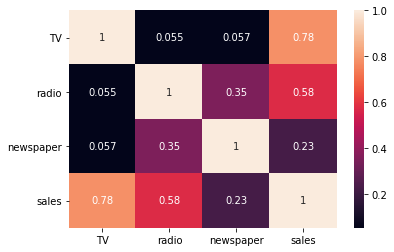

In [17]:
sns.heatmap(cor, annot=True)

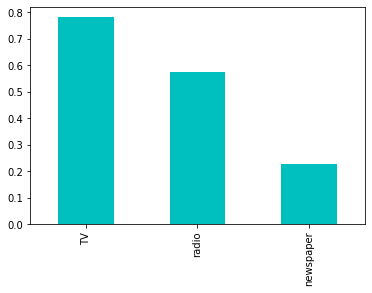

In [18]:
a.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')

In [19]:
#checking outliers


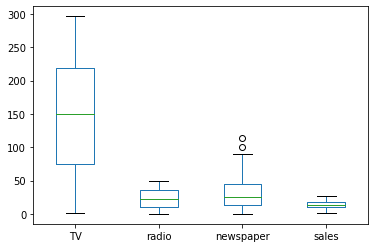

In [20]:
a.plot.box()

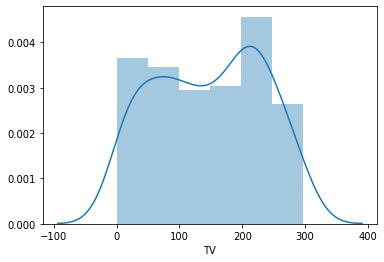

In [21]:
sns.distplot(a['TV'])

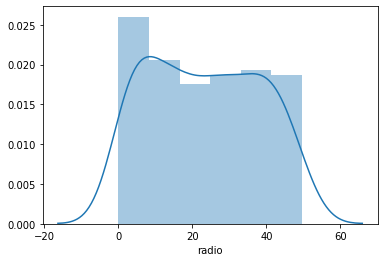

In [22]:
sns.distplot(a['radio'])

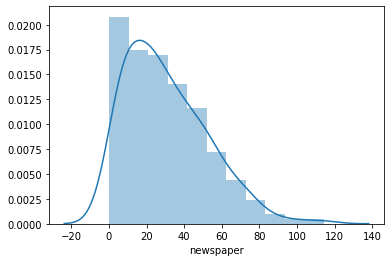

In [23]:
sns.distplot(a['newspaper'])

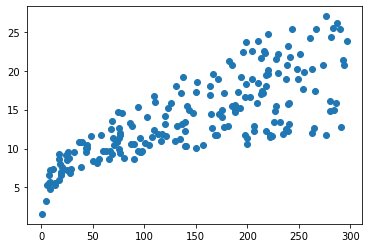

In [24]:
plt.scatter(a["TV"],a["sales"])

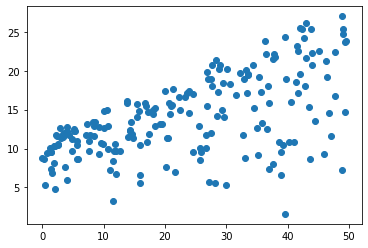

In [25]:
plt.scatter(a["radio"],a["sales"])

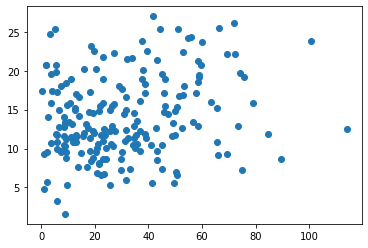

In [26]:
plt.scatter(a["newspaper"],a["sales"])

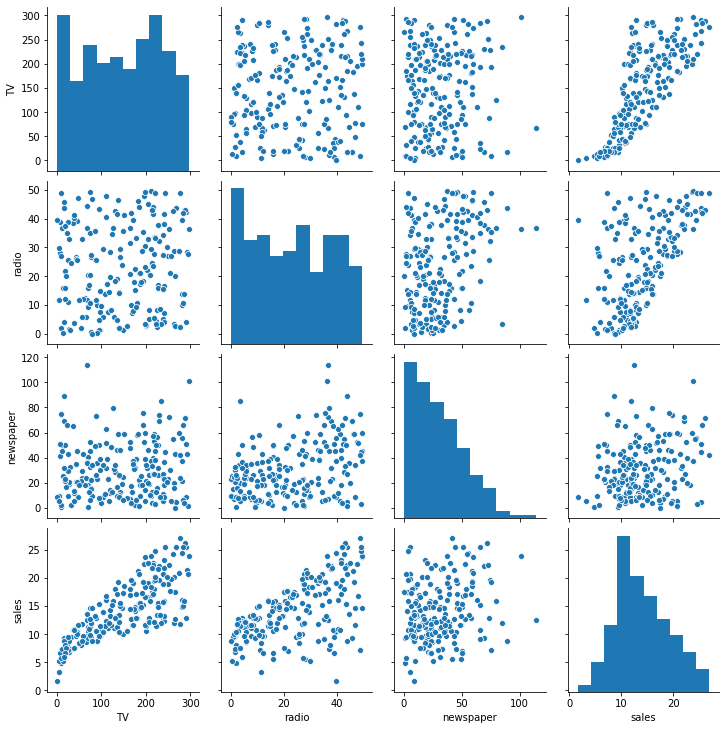

In [27]:
sns.pairplot(a)

In [28]:
from scipy.stats import zscore

In [29]:
z=np.abs(zscore(a))

In [30]:
threshhold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [31]:
new_a=a[(z<3).all(axis=1)]

In [32]:
new_a

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [33]:
new_a.shape

(198, 4)

In [34]:
a.shape

(200, 4)

In [35]:
# 2 rows are missing which is 1% of data

### data spliting 

In [67]:
x=new_a.drop(["sales"],axis=1)
y=new_a["sales"]

In [37]:
x.shape

(198, 3)

In [38]:
y.shape

(198,)

### MinMax Scaler

In [75]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

In [78]:
x_train.shape

(138, 3)

In [79]:
x_test.shape

(60, 3)

In [80]:
y_train.shape

(138,)

In [81]:
y_test.shape

(60,)

### Modeling  applying 

##### Linear regression


In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
ln=LinearRegression()

In [84]:
ln.fit(x_train,y_train)

LinearRegression()

In [85]:
ln.coef_

array([3.80578513, 2.73285341, 0.27410155])

In [86]:
ln.intercept_ 

13.943246663608633

In [87]:
ln.score(x_train,y_train)

0.8949751177619989

### cross validation 

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(5)
score=cross_val_score(ln,x,y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[0.87988273 0.9176965  0.92510819 0.80845813 0.89565733]
0.8853605756683912
0.04165453399577511


### Regularization

In [89]:
from sklearn import linear_model

In [90]:
la = linear_model.Lasso(alpha=0.1)
la.fit(x_train,y_train)
la.score(x_train,y_train)

0.8941445777150909

In [91]:
rd = linear_model.Ridge(alpha=0.1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8949746747019081